In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

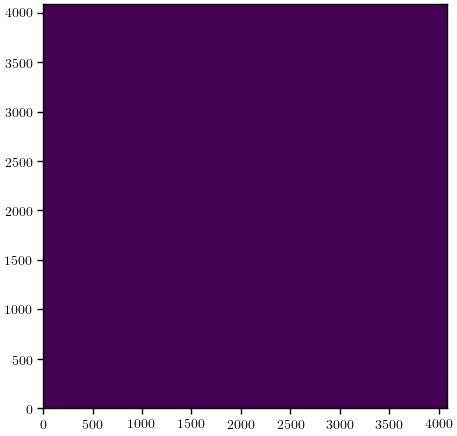

In [2]:
sca = np.zeros((4088, 4088))

plt.imshow(sca)
plt.show()

In [3]:
side = int(4088 / 4)

centers = [(side, side), (3 * side, side), (side, 3 * side), (3 * side, 3 * side), (side * 2, side * 2)]
print(centers)

[(1022, 1022), (3066, 1022), (1022, 3066), (3066, 3066), (2044, 2044)]


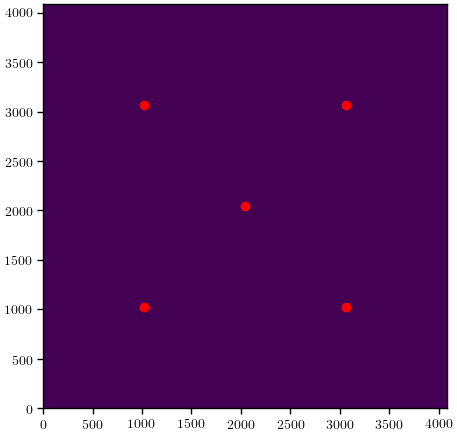

In [4]:
plt.imshow(sca)
for center in centers:
    plt.scatter(center[0], center[1], c='r')
plt.show()

In [5]:
num_scas = 18
num_points = len(centers)
num_filters = 4

print(f'Total PSFs: {num_scas * num_points * num_filters}')

Total PSFs: 360


[(1022, 1022), (1022, 3066), (3066, 1022), (3066, 3066)]


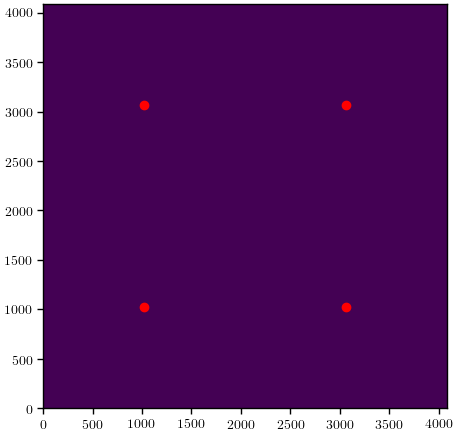

In [33]:
side = 2
num_centers = side ** 2
piece = int(4088 / num_centers)

centers = []
for i in range(num_centers):
    for j in range(num_centers):
        if i % 2 != 0 and j % 2 != 0:
            centers.append((piece * i, piece * j))

print(centers)

plt.imshow(sca)
for center in centers:
    plt.scatter(center[0], center[1], c='r')
plt.show()

In [ ]:
# from mejiro.instruments.roman import divide_up_sca

# centers = divide_up_sca(4)
# pprint(centers)